In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

# Data description
Feature	Explanation 
Date	Date of last day (a sunday) in the given week of measurement 
AveragePrice	Per unit (per avocado) cost
Total Volume	Total number of avocados sold
4046	Total number of avocados with PLU (Product Look Up code) 4046 sold*
4225	Total number of avocados with PLU 4225 sold
4770	Total number of avocados with PLU 4770 sold
Total Bags	Total number of bags sold (a bag contains multiple avocados)
Small Bags	Number of small bags sold 
Large Bags	Number of large bags sold
XLarge Bags	Number of Xlarge bags sold 
type	Type of avocado, either conventional or organic 
year	Year 
region	A specified region in the US (not necessarily a state)


# Price and sales data

## General data analysis

In [22]:
price_df = pd.read_csv('Data\price-and-sales-data.csv')
price_df.head()

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,2015-01-04,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


In [23]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25161 entries, 0 to 25160
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          25161 non-null  object 
 1   AveragePrice  24259 non-null  float64
 2   TotalVolume   24212 non-null  float64
 3   4046          24261 non-null  float64
 4   4225          24255 non-null  float64
 5   4770          24245 non-null  float64
 6   TotalBags     24271 non-null  float64
 7   SmallBags     24227 non-null  float64
 8   LargeBags     24214 non-null  float64
 9   XLargeBags    24293 non-null  float64
 10  type          25161 non-null  object 
 11  year          25161 non-null  int64  
 12  region        25161 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.5+ MB


In [24]:
price_df.describe()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,24259.000000,2.421200e+04,2.426100e+04,2.425500e+04,2.424500e+04,2.427100e+04,2.422700e+04,2.421400e+04,24293.000000,25161.000000
mean,1.396018,9.170913e+05,2.981530e+05,2.958284e+05,2.246362e+04,2.950432e+05,2.124199e+05,7.589924e+04,4405.638467,2016.776877
std,0.384476,3.731937e+06,1.288583e+06,1.209445e+06,1.046621e+05,1.232967e+06,8.693043e+05,3.586079e+05,25806.499886,1.323978
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.110000,1.323404e+04,8.225900e+02,3.061135e+03,0.000000e+00,7.319505e+03,4.770445e+03,2.358200e+02,0.000000,2016.000000
50%,1.360000,1.190528e+05,9.855110e+03,2.697755e+04,1.937600e+02,4.625771e+04,3.133734e+04,4.043680e+03,0.000000,2017.000000
75%,1.640000,4.733783e+05,1.141219e+05,1.498719e+05,6.078170e+03,1.394295e+05,1.008827e+05,3.050337e+04,313.890000,2018.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,7.864297e+06,844929.830000,2019.000000


In [25]:
price_df.isnull().sum()

Date              0
AveragePrice    902
TotalVolume     949
4046            900
4225            906
4770            916
TotalBags       890
SmallBags       934
LargeBags       947
XLargeBags      868
type              0
year              0
region            0
dtype: int64

## Univariate analysis

### 1. Is the distribution of avocado type balanced?

conventional    12582
organic         12579
Name: type, dtype: int64


Text(0.5, 1.0, 'Share of two avocado types')

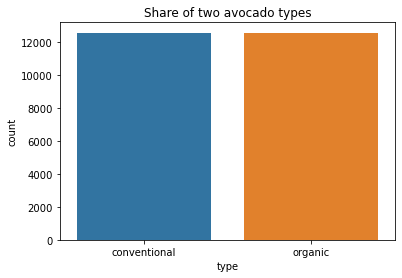

In [26]:
print(price_df['type'].value_counts())
sns.countplot(x = 'type', data=price_df)
plt.title('Share of two avocado types')

### 2. How is the distribution of avocado price?

Text(0.5, 1.0, 'Average Price Distribution')

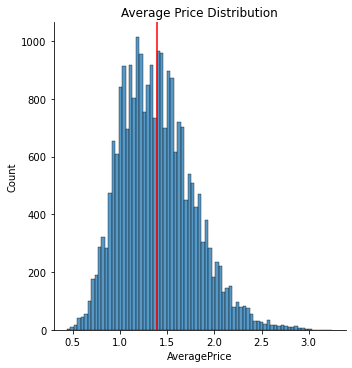

In [27]:
sns.displot(x='AveragePrice', data=price_df)
plt.axvline(x=price_df['AveragePrice'].mean(), color='red')
plt.title('Average Price Distribution')

### Distribution of avocado sales

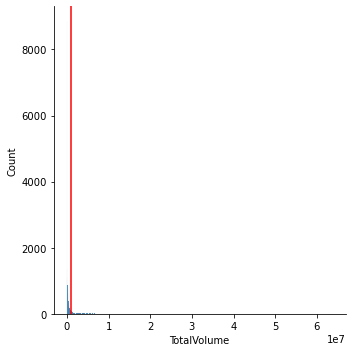

In [28]:
sns.displot(x='TotalVolume', data=price_df)
plt.axvline(x=price_df['TotalVolume'].mean(), color='red')

## Multivariate analysis

### Region and total price

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

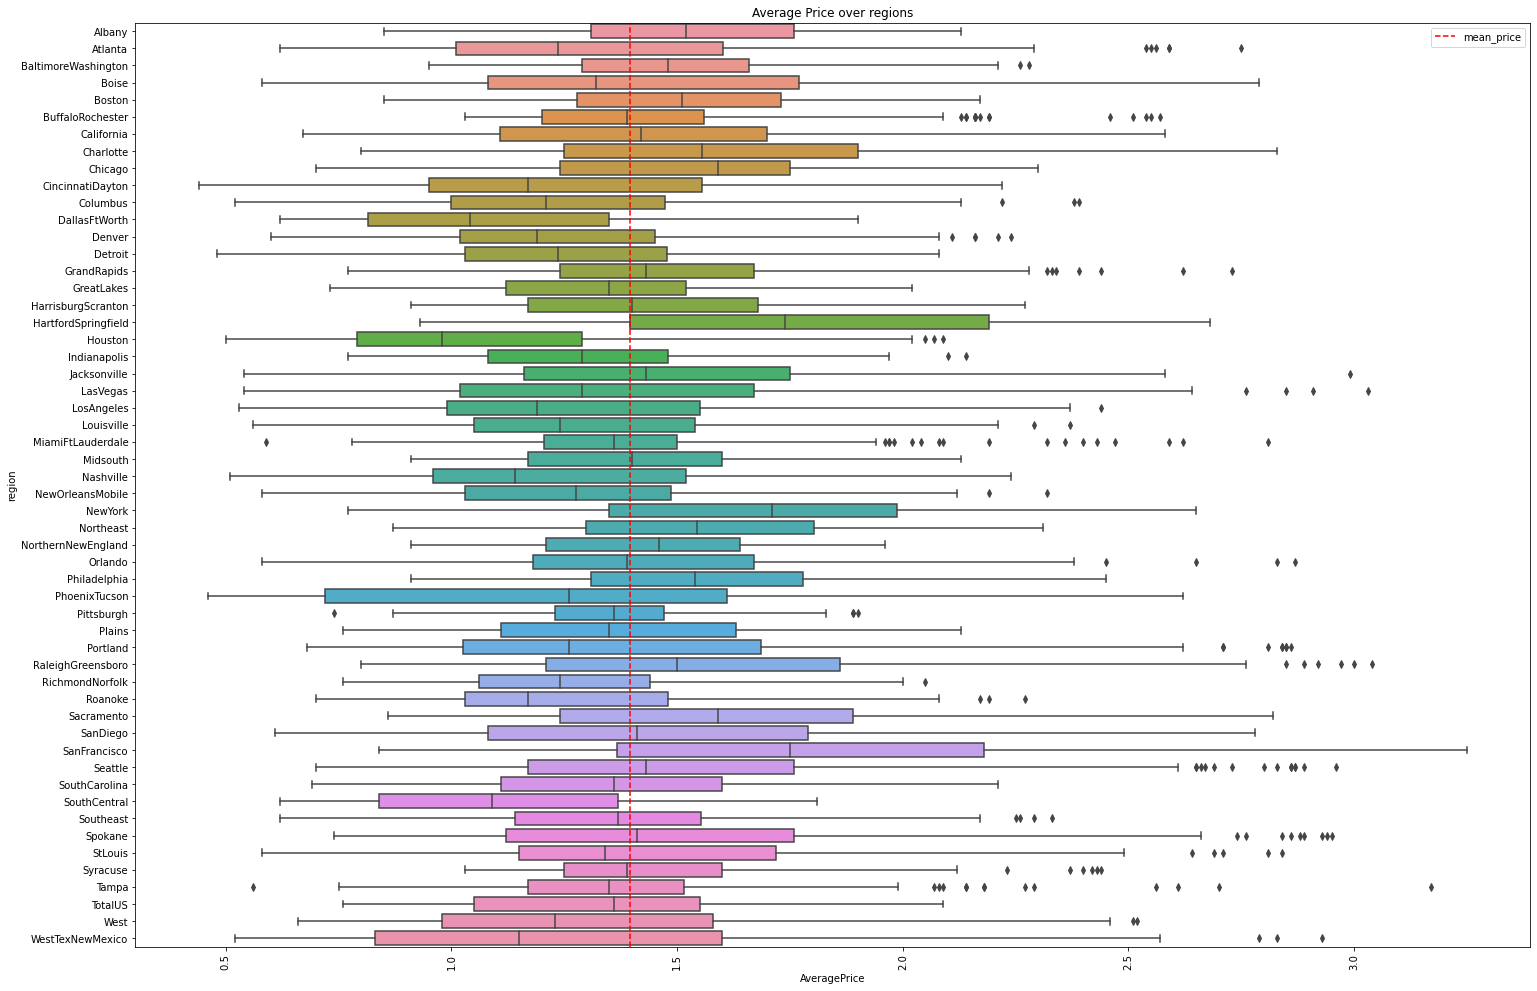

In [61]:
plt.figure(figsize=(25,17))
sns.boxplot(x='AveragePrice', y='region', data=price_df)
plt.axvline(price_df['AveragePrice'].mean(), label='mean_price', linestyle='--', color='red')
plt.legend()
plt.title('Average Price over regions')
plt.xticks(rotation=90)

### Avocado types and prices

Text(0.5, 1.0, 'Price distributions between two different avocado types')

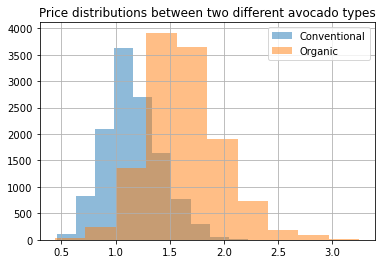

In [30]:
price_df[price_df['type'] == 'conventional']['AveragePrice'].hist(alpha=0.5)
price_df[price_df['type'] == 'organic']['AveragePrice'].hist(alpha=0.5)
plt.legend(['Conventional', 'Organic'])
plt.title('Price distributions between two different avocado types')

### Region and sales volume

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

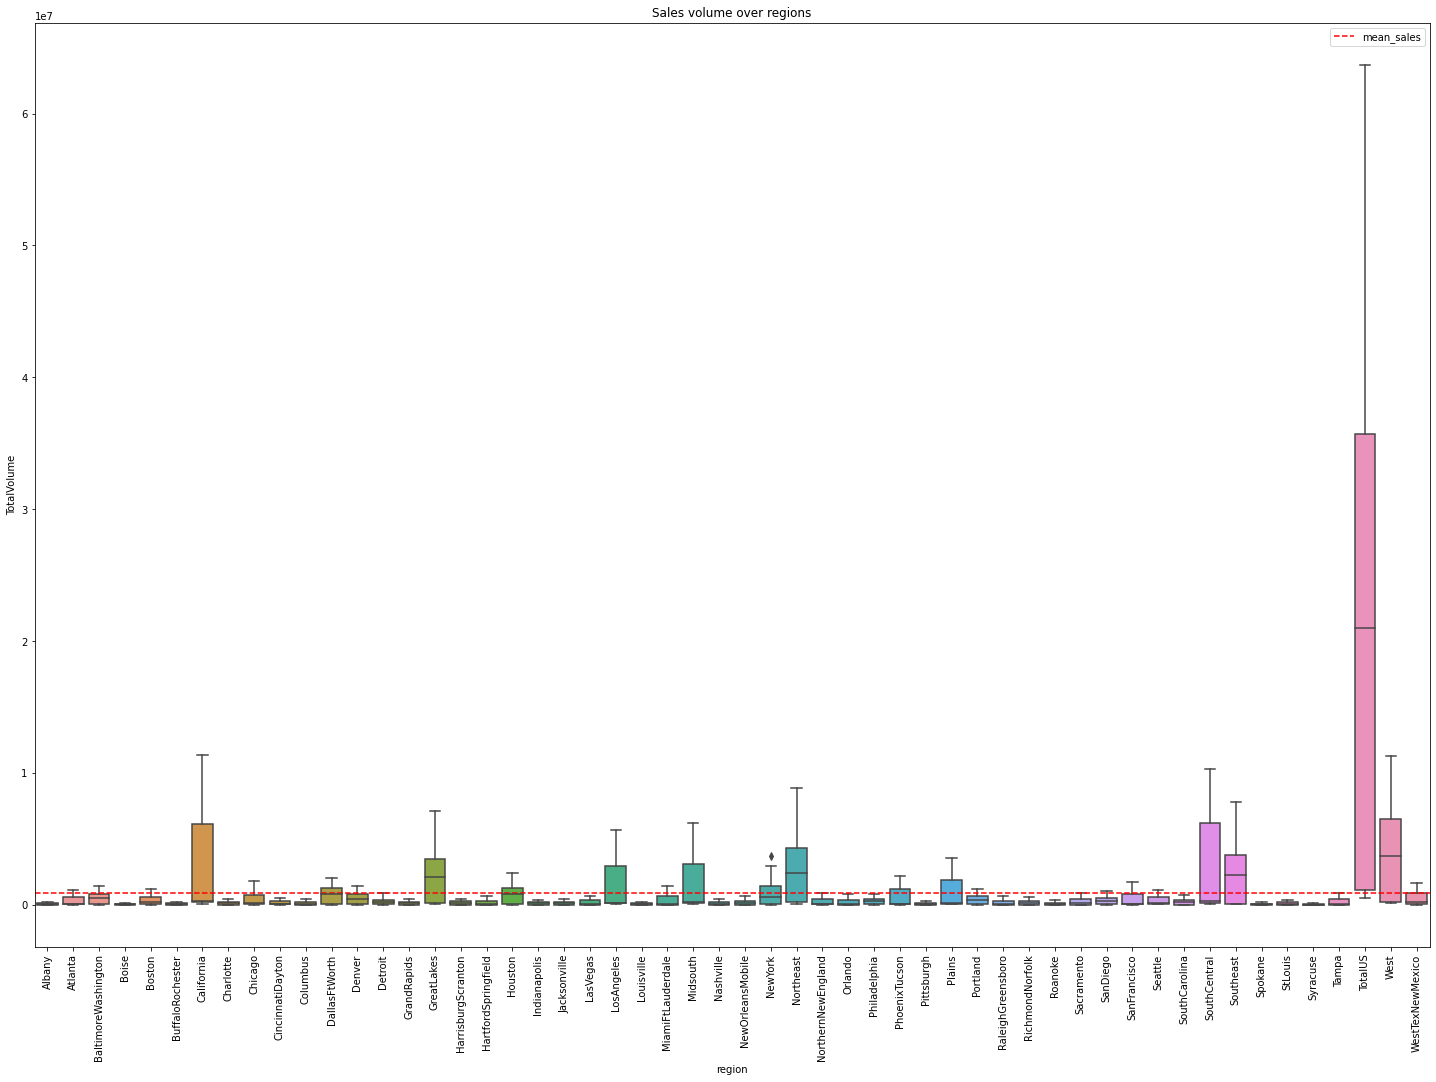

In [31]:
plt.figure(figsize=(25,17))
sns.boxplot(x='region', y='TotalVolume', data=price_df)
plt.axhline(price_df['TotalVolume'].mean(), label='mean_sales', linestyle='--', color='red')
plt.legend()
plt.title('Sales volume over regions')
plt.xticks(rotation=90)

### Average Price and sales per day

In [32]:
group_df = price_df.groupby('Date').mean()


Text(0.5, 1.0, 'Average Price over years')

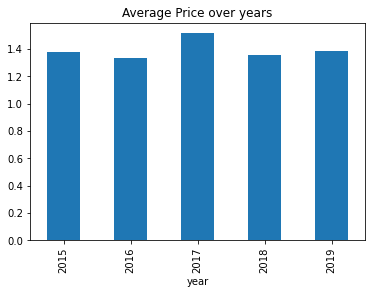

In [33]:
year_group_df = price_df.groupby('year').mean()
year_group_df['AveragePrice'].plot.bar()
plt.title('Average Price over years')

In [34]:
group_df.shape

(233, 10)

In [35]:
# Number of unique dates
print('Number of dates', len(group_df.index.unique()))

Number of dates 233


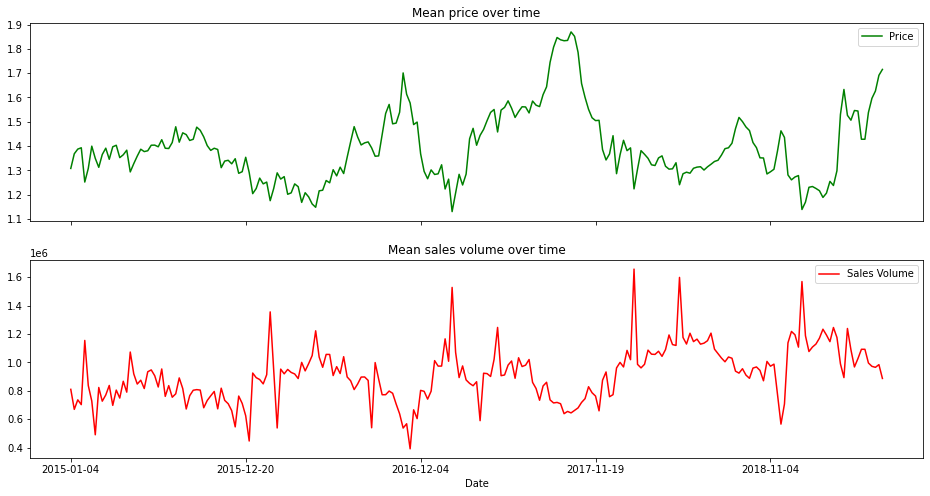

In [36]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(16,8))
group_df['AveragePrice'].plot(color='green', label='Price', ax=ax[0])
ax[0].legend()
ax[0].set_title('Mean price over time')
group_df['TotalVolume'].plot(color='red', label='Sales Volume', ax=ax[1])
ax[1].set_title('Mean sales volume over time')
ax[1].legend()

In [37]:
group_df.head()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
Date,,,,,,,,,,
2015-01-04,1.307835,8.099662e+05,304596.562243,340660.346792,22114.101961,119075.949904,93624.194660,24117.389216,490.840680,2015.0
2015-01-11,1.368208,6.689602e+05,299851.904078,287881.821415,22233.286571,119305.813700,99658.819697,19351.208400,435.928687,2015.0
2015-01-18,1.387429,7.361360e+05,311621.951176,287541.832200,19767.117692,122958.558350,101182.939515,13207.779223,201.363208,2015.0
2015-01-25,1.392913,7.023153e+05,266170.388835,286200.404600,19607.347736,117674.171262,104106.798431,21826.248725,220.965644,2015.0
2015-02-01,1.251792,1.154487e+06,481927.676990,480036.740777,35116.136857,137658.960769,65358.247778,28182.174135,1085.095545,2015.0


## Missing values and duplicated rows

Text(0.5, 1.0, 'Missing values distribution (mark as red)')

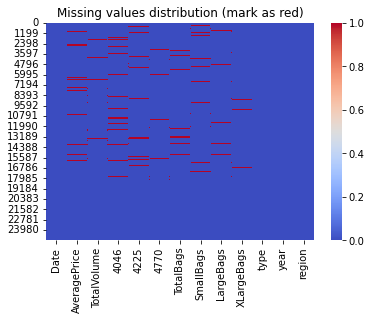

In [38]:
## Missing heatmap
sns.heatmap(price_df.isnull(), cmap='coolwarm')
plt.title('Missing values distribution (mark as red)')

In [39]:
# Check duplications
price_df.duplicated(keep=False).sum()

0

## Correlation

<AxesSubplot:>

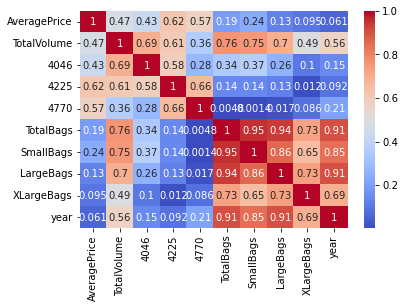

In [40]:
sns.heatmap(np.abs(group_df.corr()),cmap='coolwarm', annot=True)

<AxesSubplot:>

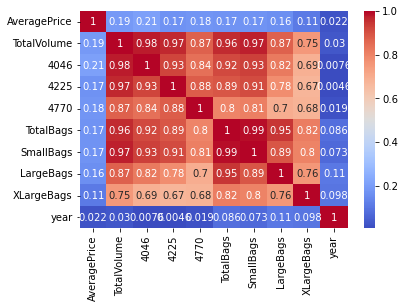

In [41]:
sns.heatmap(np.abs(price_df.corr()), cmap='coolwarm', annot=True)

## Prophet for visualizing the trend

In [42]:
data = price_df[['Date', 'AveragePrice']]
data.columns = ['ds', 'y']
m = Prophet(yearly_seasonality=True, weekly_seasonality=False)
m.add_country_holidays(country_name='US')
m.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
m.train_holiday_names

0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

In [44]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

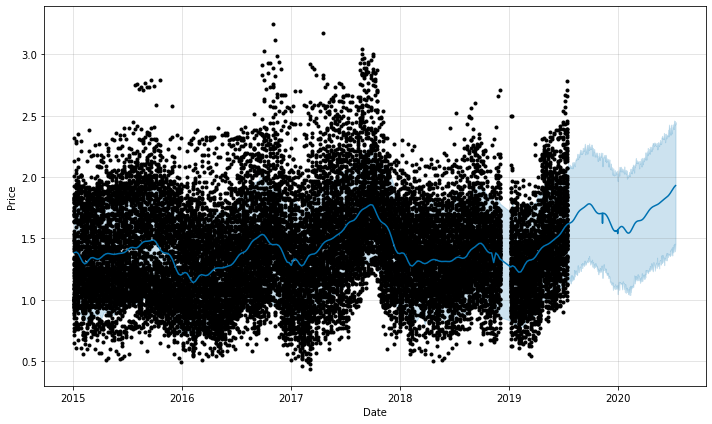

In [45]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

Text(0.5, 1.0, 'Prophet analysis')

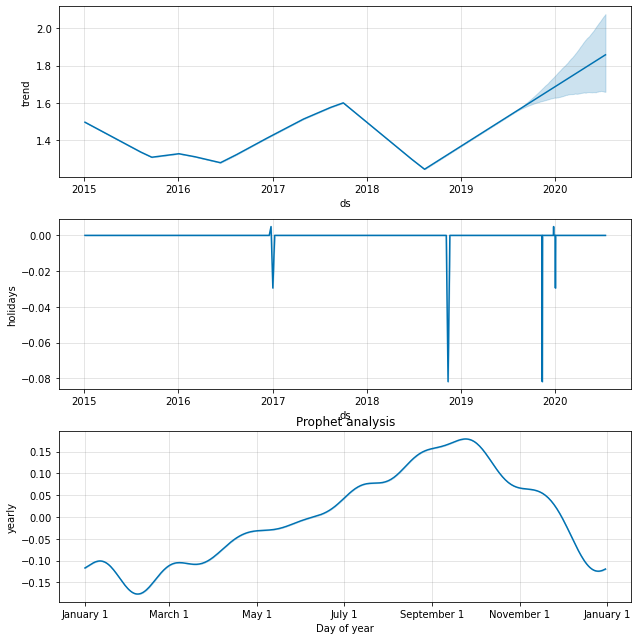

In [56]:
m.plot_components(forecast)
plt.title('Prophet analysis')

# Google Data

In [47]:
google_df = pd.read_csv('Data/google-data.csv')
google_df.head(10)

,Week,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,2015-01-04,46,76,84,8,51,10
1,2015-01-11,48,79,76,8,38,29
2,2015-01-18,48,82,84,9,66,27
3,2015-01-25,49,82,89,8,44,28
4,2015-02-01,52,81,82,7,46,42
5,2015-02-08,41,80,67,8,60,40
6,2015-02-15,40,80,61,7,48,17
7,2015-02-22,41,82,55,8,50,23
8,2015-03-01,44,83,72,9,38,26
9,2015-03-08,41,80,66,7,47,31


In [48]:
google_df.tail(10)

,Week,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
229,2019-05-26,65,81,70,55,67,47
230,2019-06-02,61,83,62,58,74,38
231,2019-06-09,62,82,66,57,60,55
232,2019-06-16,59,80,70,51,56,41
233,2019-06-23,57,79,71,53,45,56
234,2019-06-30,61,73,80,52,62,35
235,2019-07-07,58,76,66,55,51,42
236,2019-07-14,60,76,68,53,50,43
237,2019-07-21,60,74,68,56,54,49
238,2019-07-28,66,74,79,55,46,36


In [49]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Week                               239 non-null    object
 1   avocado: (United States)           239 non-null    int64 
 2   organic: (United States)           239 non-null    int64 
 3   avocado recipe: (United States)    239 non-null    int64 
 4   avocado toast: (United States)     239 non-null    int64 
 5   avocado sandwich: (United States)  239 non-null    int64 
 6   organic avocado: (United States)   239 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.2+ KB


In [50]:
google_df.describe()

,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,52.309623,82.497908,66.991632,32.711297,50.179916,36.062762
std,11.291978,6.845764,14.840890,19.542141,12.261723,12.702157
min,29.000000,56.000000,33.000000,7.000000,15.000000,10.000000
25%,44.500000,79.000000,55.000000,15.000000,42.000000,27.000000
50%,52.000000,83.000000,68.000000,30.000000,50.000000,35.000000
75%,60.000000,87.000000,78.500000,50.500000,59.000000,44.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [51]:
google_df.set_index('Week', inplace=True)

In [52]:
print('Is unique ',google_df.index.is_unique)
print('Google data search dates length', len(google_df.index.unique()))
print('Number of dates on sales dataset', len(group_df.index.unique()))

Is unique  True
Google data search dates length 239
Number of dates on sales dataset 233


In [53]:
print(set(google_df.index) - set(group_df.index))
print(set(group_df.index) - set(google_df.index))

{'2019-01-06', '2018-12-23', '2019-07-28', '2018-12-30', '2018-12-09', '2019-07-21', '2018-12-16'}
{'2019-01-07'}


In [54]:
google_df.head()

,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
Week,,,,,,
2015-01-04,46,76,84,8,51,10
2015-01-11,48,79,76,8,38,29
2015-01-18,48,82,84,9,66,27
2015-01-25,49,82,89,8,44,28
2015-02-01,52,81,82,7,46,42


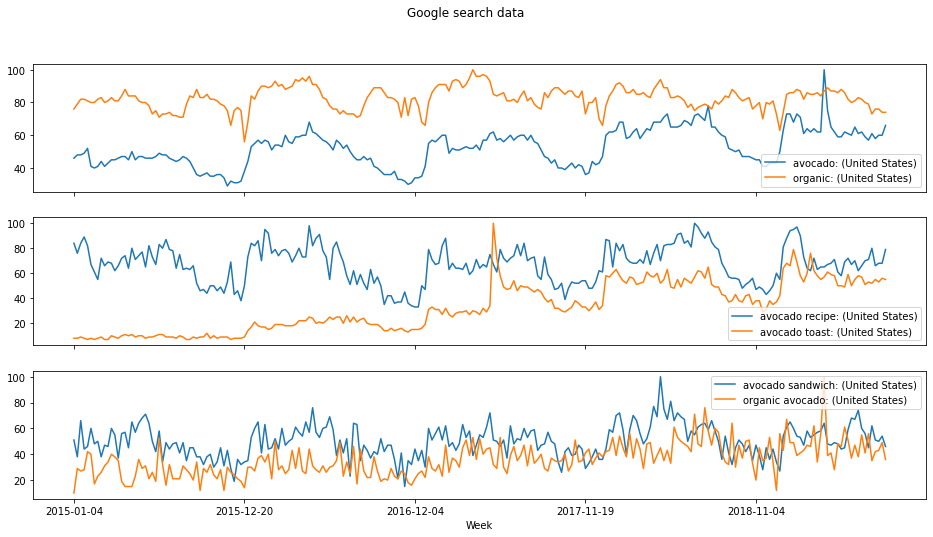

In [59]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(16, 8))
google_df.iloc[:, :2].plot(figsize=(16, 8), ax=axs[0])
google_df.iloc[:, 2:4].plot(figsize=(16, 8), ax=axs[1])
google_df.iloc[:, 4:].plot(figsize=(16, 8), ax=axs[2])
plt.suptitle('Google search data')
plt.legend(loc='upper right')
plt.show()